In [1]:
!pip install category_encoders

In [2]:
!pip install imblearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('bank_additional_full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Column Profiling

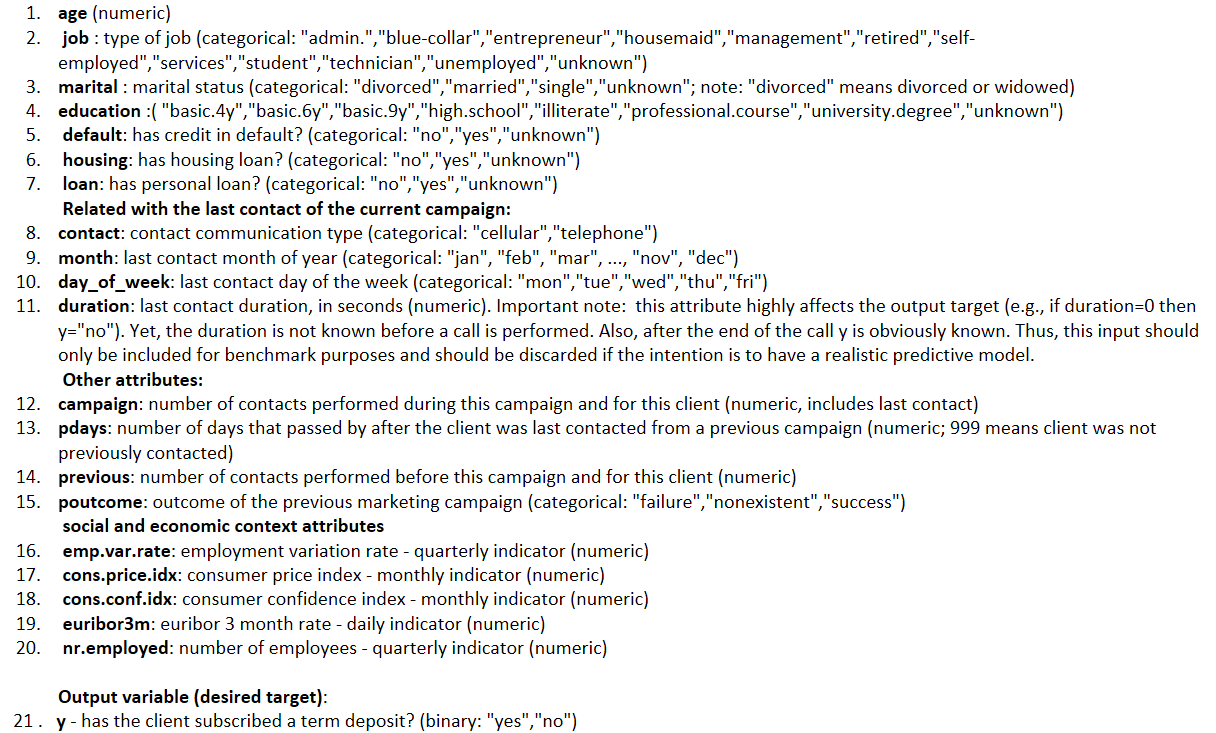


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Unique Values

In [6]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

#### Checking for Null Values

In [7]:
#Converting the unknown in categorical columns to Nan
df.replace('unknown',np.nan,inplace=True)

In [8]:
df.isnull().sum() * 100 / len(df)

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

#### Distribution of Target Variable

In [9]:
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

* From the Data we see that its an imbalanced data 88% didn't and 11% did open a deposit.

#### Heatmap to check Linearity

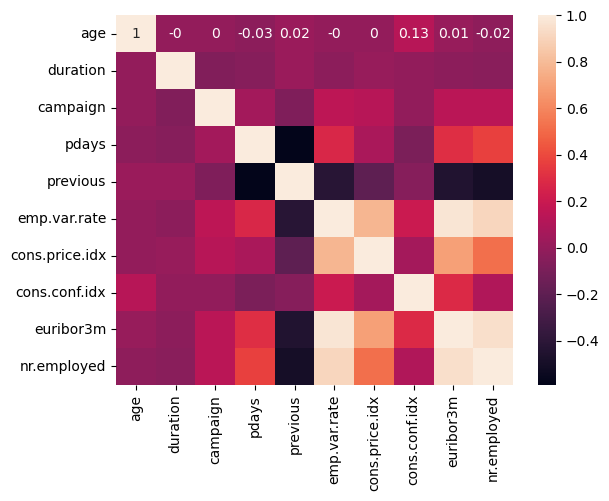

In [10]:
sns.heatmap(round(df.select_dtypes(include='number').corr(),2),annot=True)
#save the figure
plt.savefig('Num_heatmap.png',bbox_inches='tight', pad_inches=0)

<Axes: >

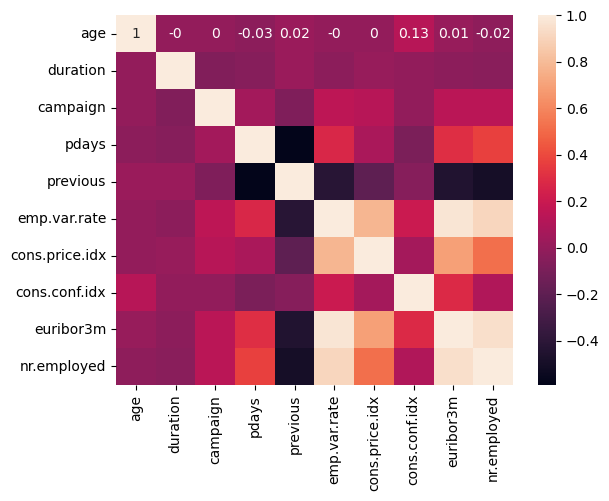

In [11]:
sns.heatmap(round(df.select_dtypes(include='number').corr(method='pearson'),2),annot=True)

#### EDA

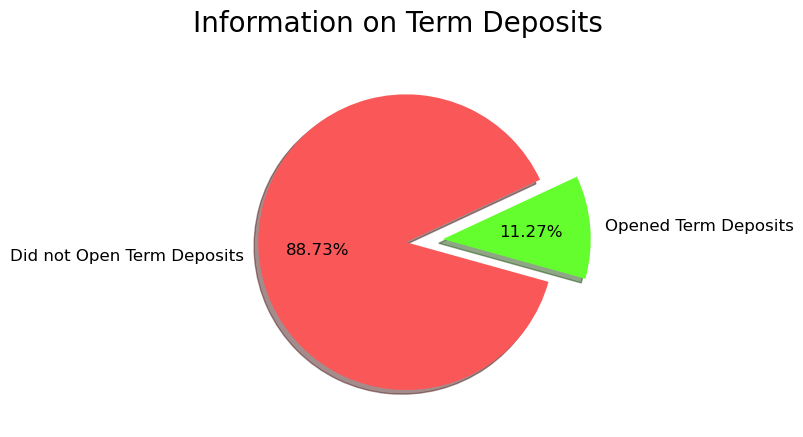

In [12]:
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Deposits", "Opened Term Deposits"

plt.suptitle('Information on Term Deposits', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,labels=labels, fontsize=12, startangle=25)
plt.ylabel("")

plt.savefig('Taget_percent.png', bbox_inches='tight', pad_inches=0)

#### Plot for Categorical Features

In [13]:
tmp1 = df.select_dtypes(include='object')
tmp1.columns
tmp1.drop('y',axis=1,inplace=True)

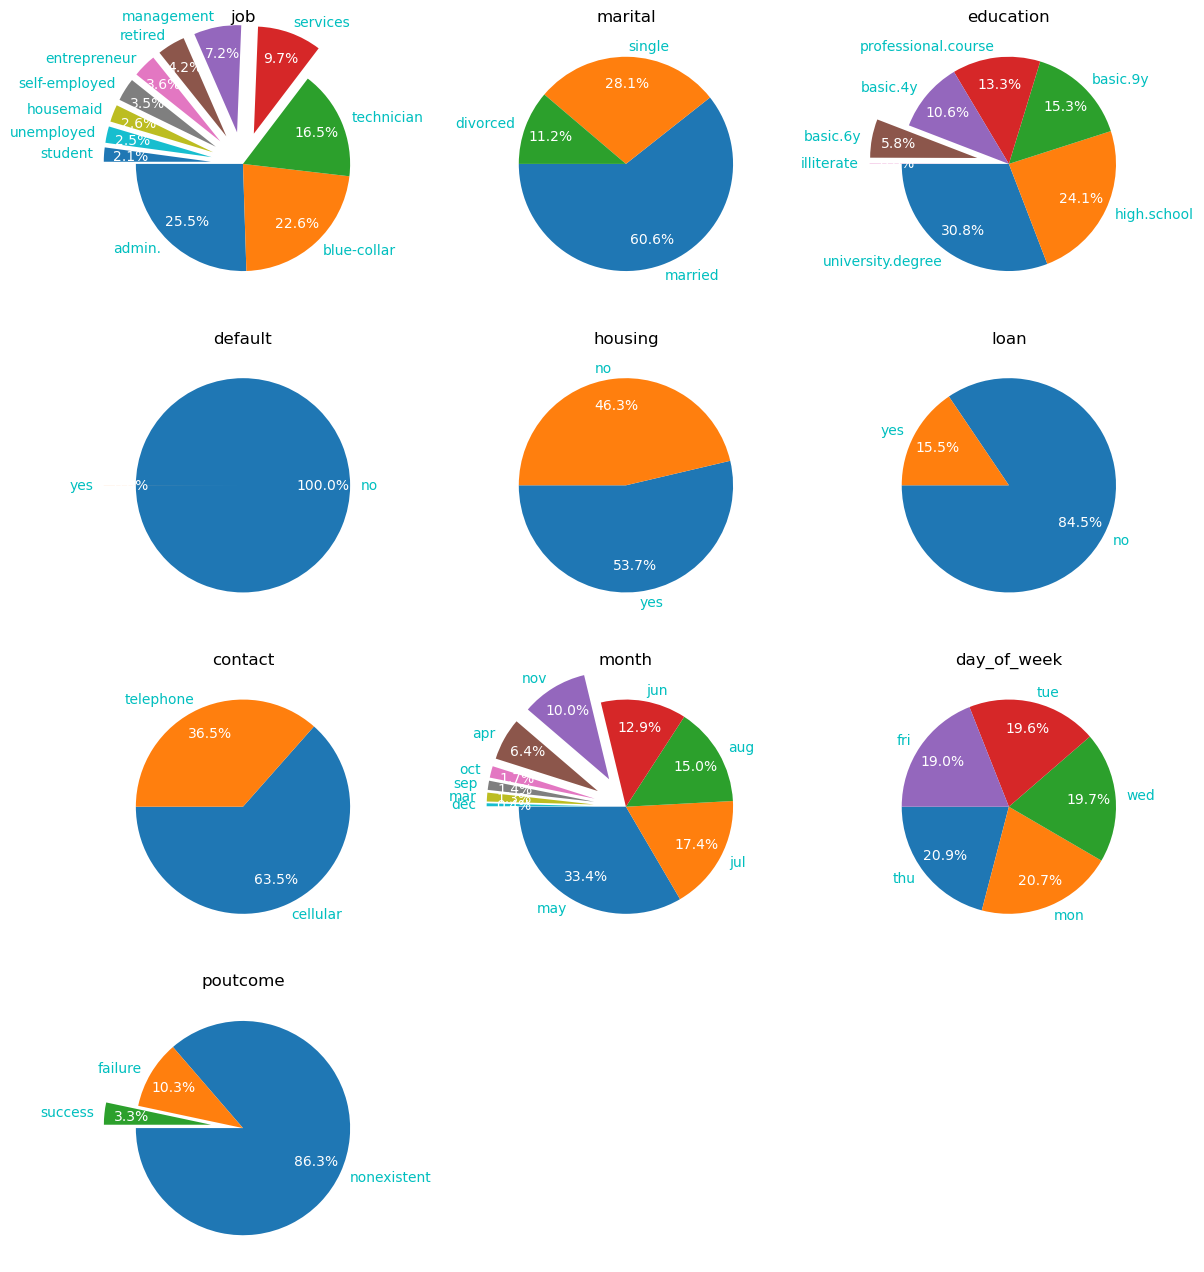

In [15]:
fig, axs = plt.subplots(4, 3, figsize=(14,16))

# Flatten axs for easy iteration
axs = axs.flatten()
c = sns.color_palette("Paired")
# Loop through each column and create a pie chart
for i, col in enumerate(tmp1.columns):
    # Get value counts for each column
    value_counts = tmp1[col].value_counts()
    # Determine threshold for narrow slices (e.g., less than 10% of total)
    threshold = 0.1 * value_counts.sum()

    # Create an explode list to offset narrow slices
    explode = [0.3 if value < threshold else 0 for value in value_counts]  # Explode narrow slices

    # Plot pie chart for each column
    axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180,textprops={'color': 'c'}, explode=explode, pctdistance=0.75)
    axs[i].set_title(f'{col}')
    # Customize the percentage text color to white
    for text in axs[i].texts:
        if text.get_text().endswith('%'):
            text.set_color('white')  # Set percentage text color to white

# Hide the last two subplots
for j in range(len(tmp1.columns), len(axs)):
    axs[j].axis('off')  # Hide the axis of the unused subplots

# save the figure
plt.savefig('Pie_chart_object.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Plot for Numerical Features

In [16]:
tmp = df.select_dtypes(include='number')
tmp.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

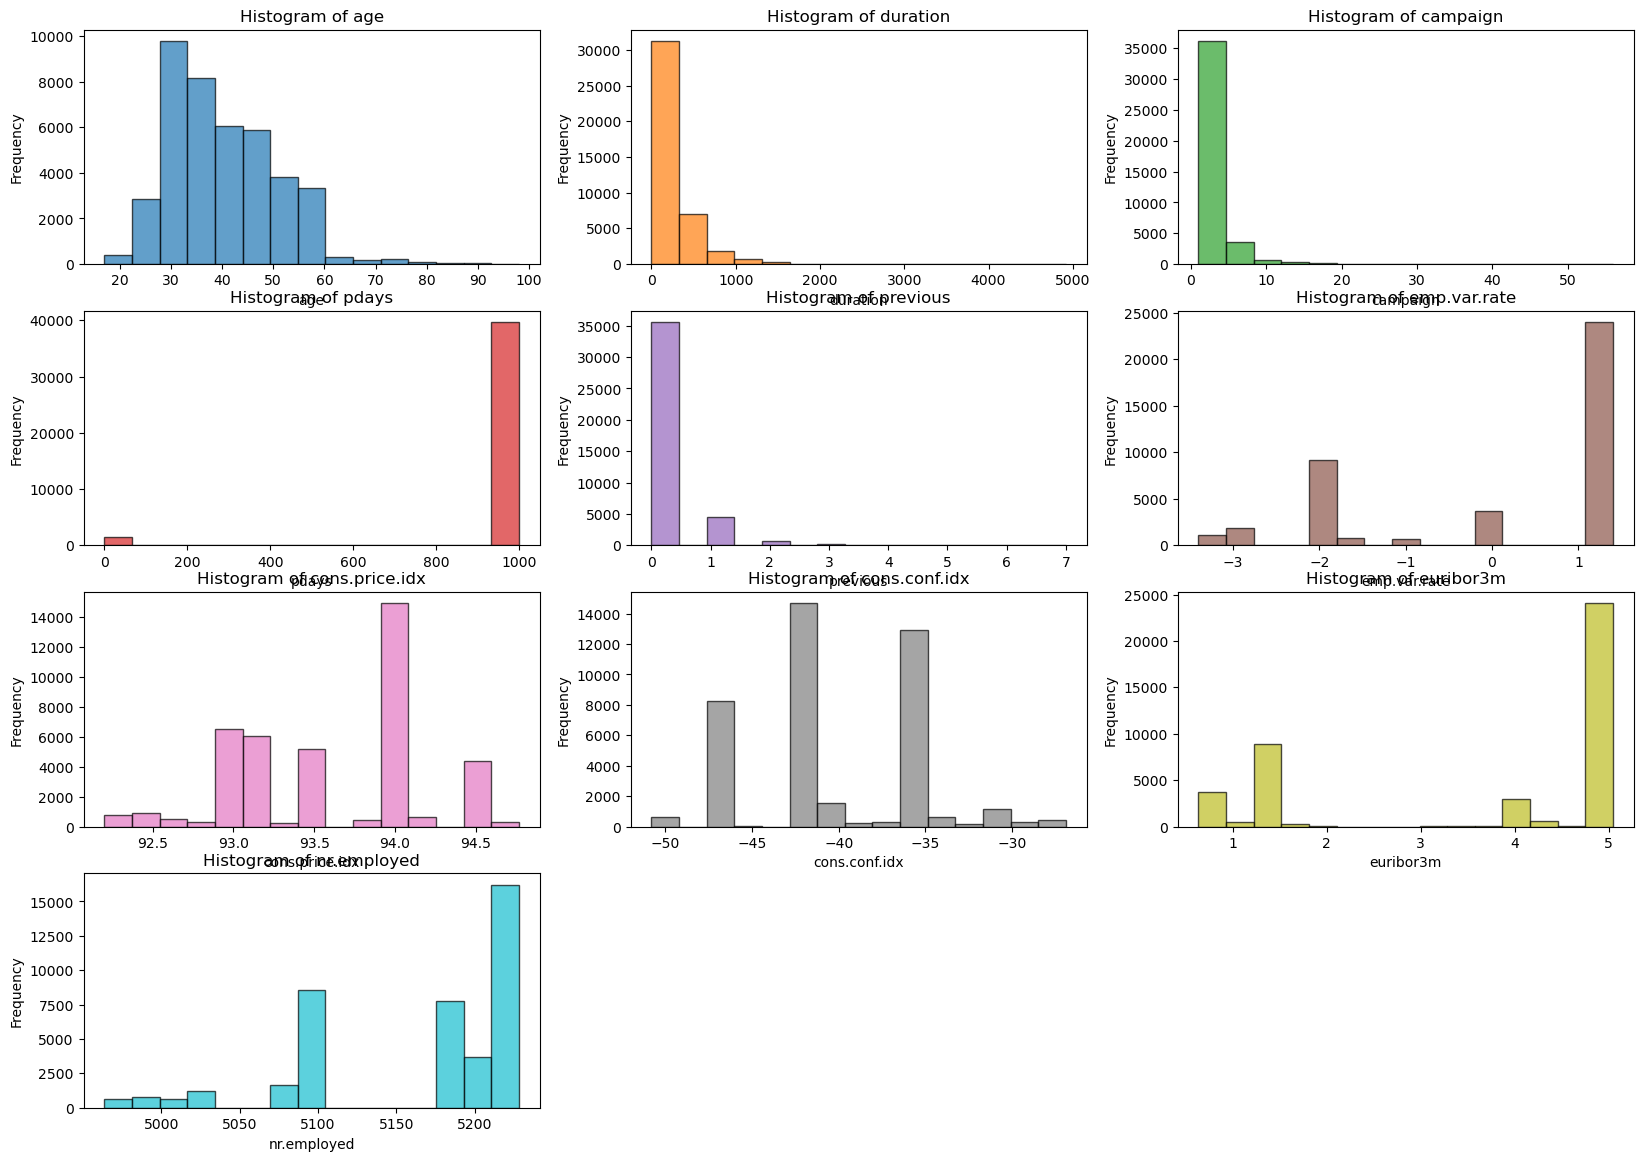

In [17]:
fig, axs = plt.subplots(4, 3, figsize=(20, 14))

# Flatten axs for easy iteration
axs = axs.flatten()
color = sns.color_palette("tab10")
# Loop through each numeric column and create a histogram
for i, col in enumerate(tmp.columns):
    axs[i].hist(tmp[col], bins=15, color=color[i], alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Hide the last two subplots
for j in range(len(tmp.columns), len(axs)):
    axs[j].axis('off')  # Hide the axis of the unused subplots

# save the figure
plt.savefig('Pie_chart_num.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Job-Profile Distribution

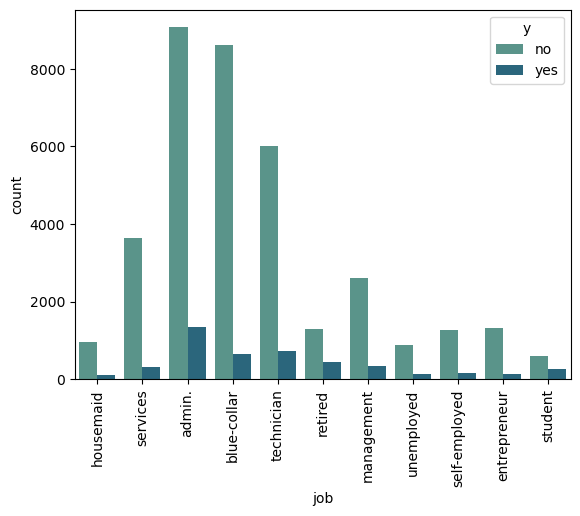

In [18]:
sns.countplot(x='job',data=df,hue='y',palette='crest')
plt.xticks(rotation=90)
# save the figure
plt.savefig('job_vs_target.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Martial Distribution

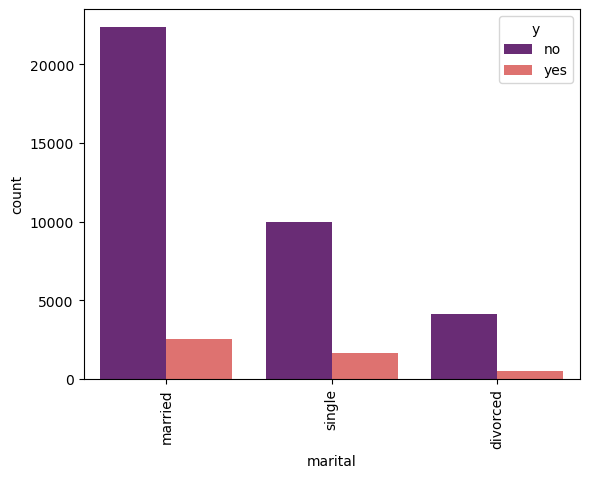

In [19]:
sns.countplot(x='marital',data=df,hue='y',palette='magma')
plt.xticks(rotation=90)
# save the figure
plt.savefig('martial_vs_target.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Education Distribution

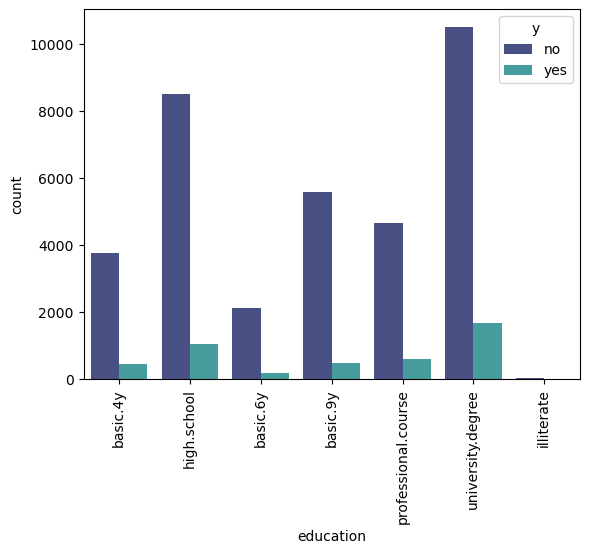

In [20]:
sns.countplot(x='education',data=df,hue='y',palette='mako')
plt.xticks(rotation=90)
# save the figure
plt.savefig('Edu_vs_target.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Age Distribution

/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/srikanta/anaconda3/envs/

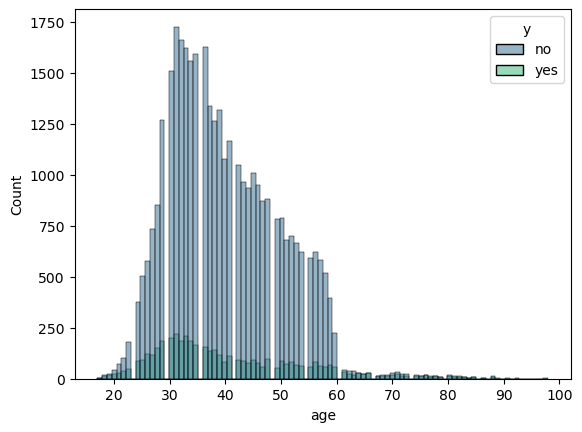

In [21]:
sns.histplot(x='age',data=df,hue='y',palette='viridis')
# save the figure
plt.savefig('Age_vs_target.png',bbox_inches='tight', pad_inches=0)
plt.show()

* Majority of the customers age varies from 20 -60

#### Age v/s Duration

/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/seaborn/

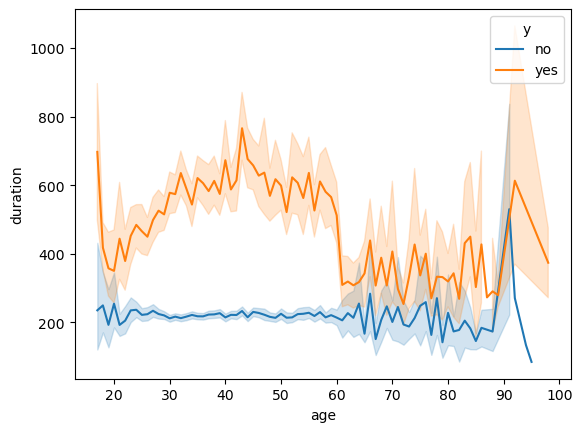

In [22]:
sns.lineplot(x='age',y='duration',data=df,hue='y')
# save the figure
plt.savefig('age_vs_duration.png',bbox_inches='tight', pad_inches=0)
plt.show()

* Longer call durations are generally associated with "yes" outcomes, while shorter durations often lead to "no" outcomes. Individuals above 90 years of age show a significant spike in call duration for "yes" results compared to younger age groups.

#### Contact v/s Duration

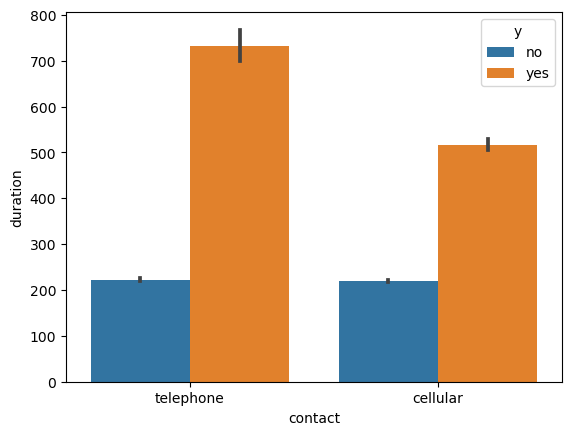

In [23]:
sns.barplot(x='contact',y='duration',data=df,hue='y')
# save the figure
plt.savefig('contact_vs_duration.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Detailed Plots of Rates and Indexes

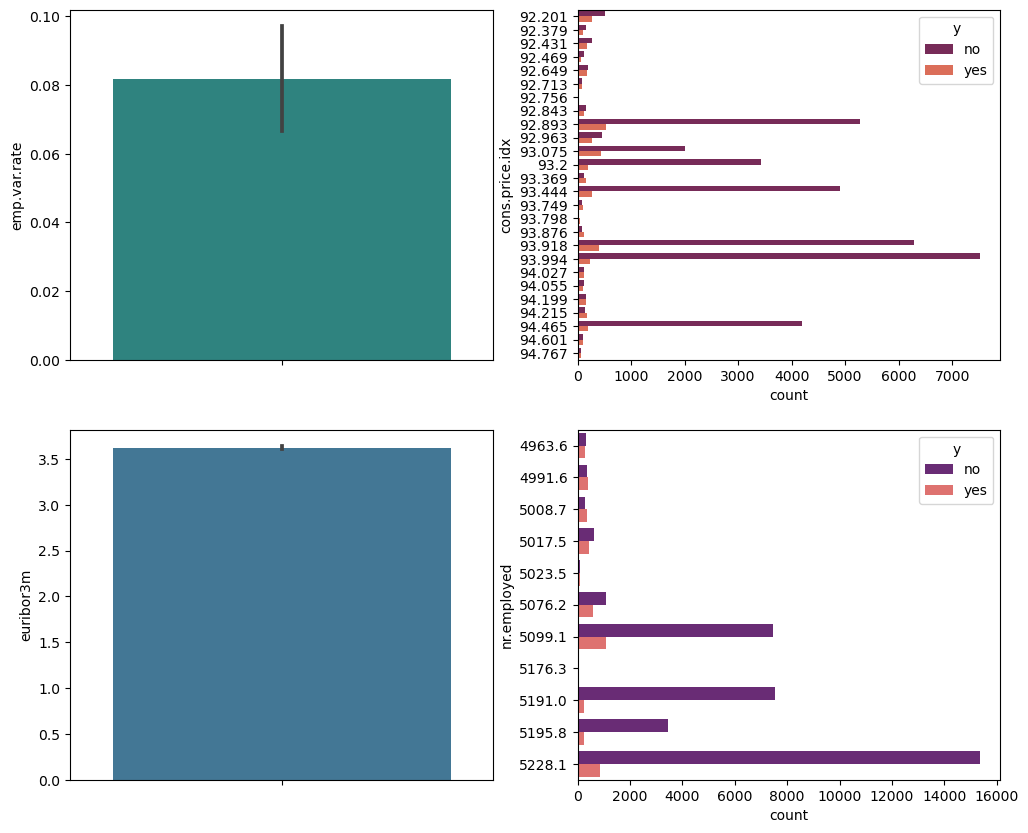

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.barplot(y='emp.var.rate',data=df,ax=axes[0,0],hue='y',palette='viridis')

sns.countplot(y='cons.price.idx',data=df,ax=axes[0,1],hue='y',palette='rocket')

sns.barplot(y='euribor3m',data=df,ax=axes[1,0],hue='y',palette='mako')

sns.countplot(y='nr.employed',data=df,ax=axes[1,1],hue='y',palette='magma')

# save the figure
plt.savefig('rate_and_index.png',bbox_inches='tight', pad_inches=0)
plt.show()

* When the target variable (y) is "yes," the employment variation rate is negative, indicating a decline in employment. When "no," the rate is slightly positive or neutral, suggesting employment is stable or growing.
* For most values of the consumer price index, the outcome "no" (target variable y) dominates, with relatively fewer "yes" outcomes across the index range. This indicates that certain price index levels may be correlated with a higher likelihood of the target outcome being "no."
* A higher euribor3m rate is associated with "no" outcomes for the target variable (y), while a lower euribor3m rate is more likely to correspond with "yes" outcomes, suggesting that a lower interest rate may be favorable for positive results.
* Last plot indicates that certain employment levels, such as around 5099 and 5191 employees, have a higher count of "no" outcomes, whereas employment levels like 5076 and 5023 have a notable proportion of "yes" outcomes. This suggests that specific employment thresholds may influence the target outcome.


#### Feature Engineering

In [25]:
# Clubbing the basic4y,basic6y,basic9y in education to basic
df['education'] = df['education'].apply(lambda x: 'basic' if x in ['basic.4y','basic.6y','basic.9y'] else x)

In [26]:
#Converting the day of week to numbers
df['day_of_week'] = df['day_of_week'].map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})

In [27]:
#Converting month to numerical
df['month'] = df['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [28]:
#Imputing the mode for the missing values in education
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [29]:
#Imputing for job grouping age,education
df['job'] = df['job'].fillna(
    df.groupby(['age', 'education'])['job'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else x))

In [30]:
#Imputing for housing and loan grouping age,education
df['housing'] = df['housing'].fillna(
    df.groupby(['age', 'education'])['housing'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else x))
df['loan'] = df['loan'].fillna(
    df.groupby(['age', 'education'])['loan'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else x))

In [31]:
#Changing default to numerical column
df['default'] = df['default'].map({'no':0,'yes':1})

In [32]:
#Performing encoding to marital column
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})

In [33]:
#Performing Knn Imputation on default and marital
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['default','marital']] = imputer.fit_transform(df[['default','marital']])

In [34]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Checking for Outliers in the Data

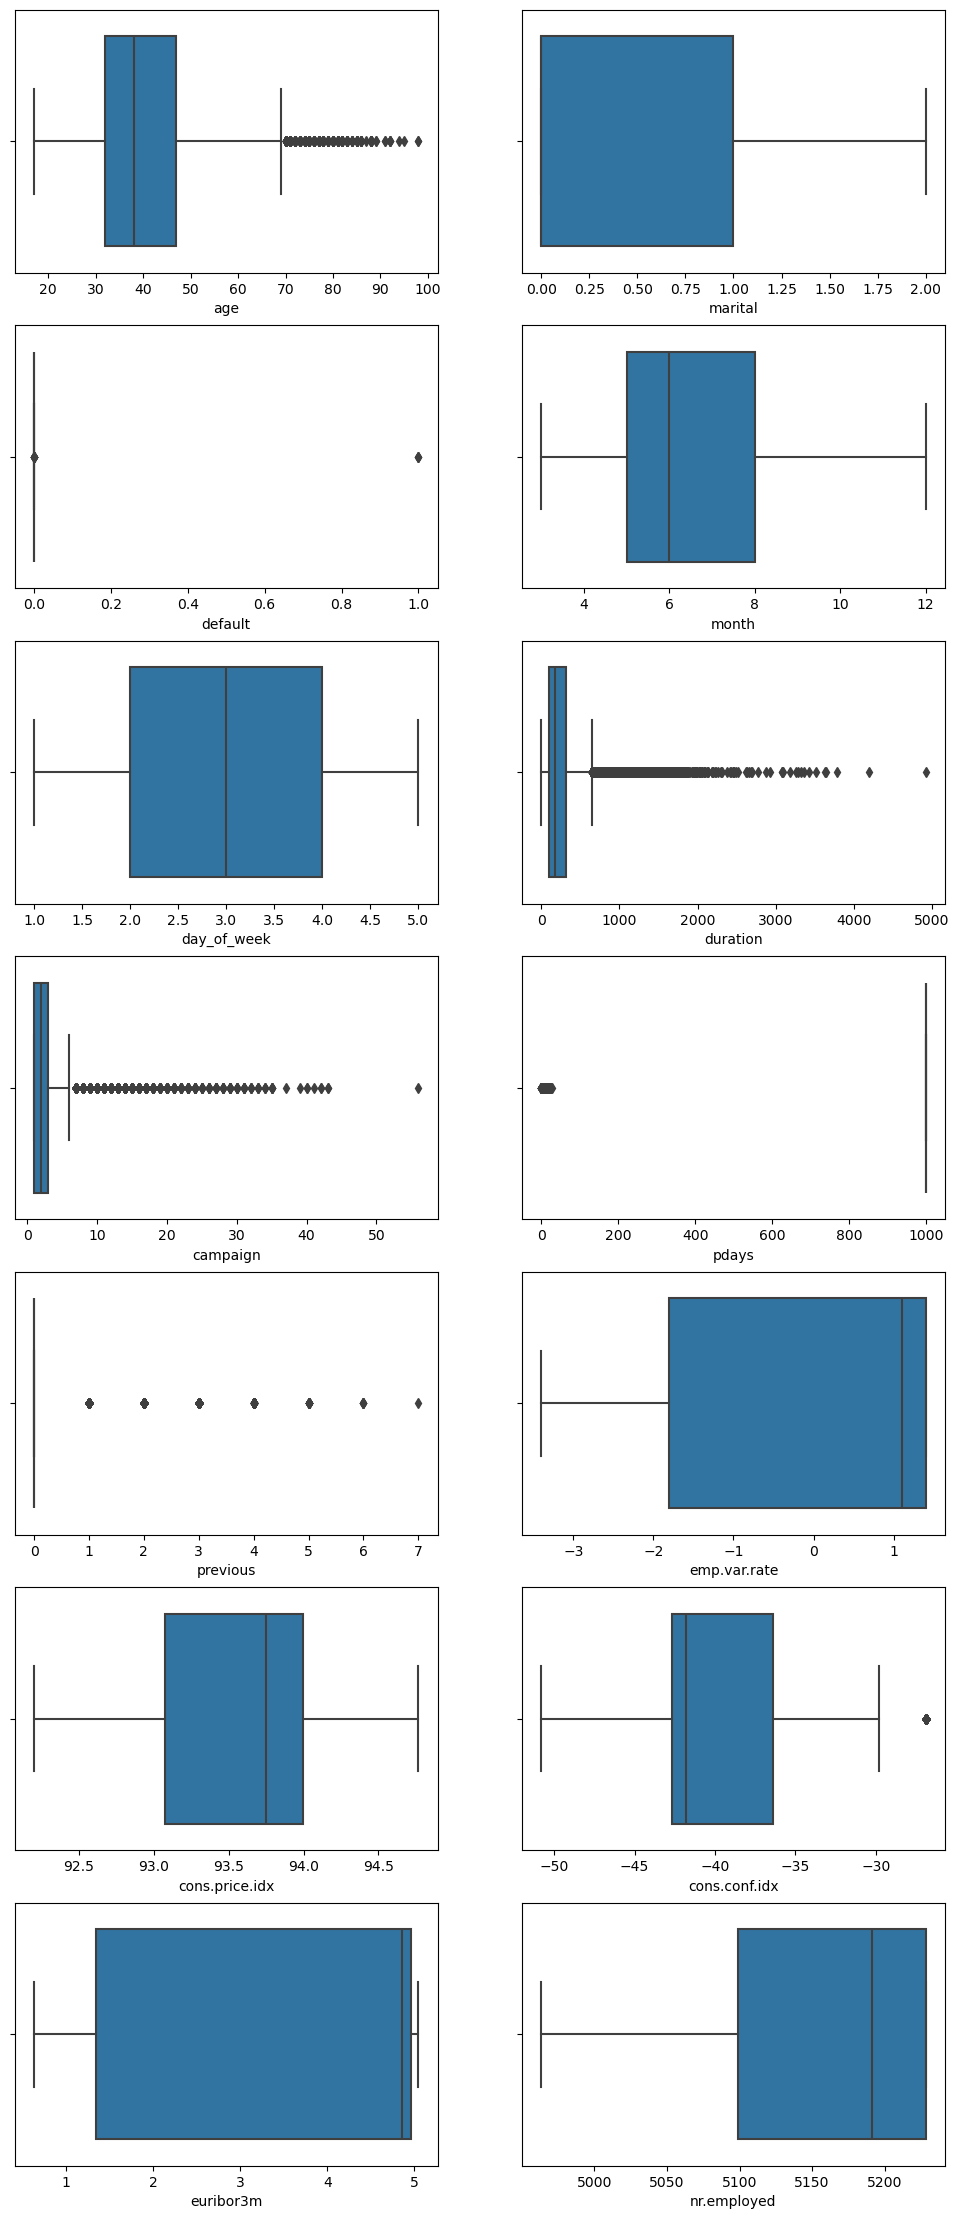

In [35]:
df_num = df.select_dtypes(include='number')
df_column_names = df_num.columns

n_columns = len(df_column_names)
fig, axes = plt.subplots(nrows=(n_columns + 1) // 2, ncols=2, figsize=(12, 28))  # Adjust ncols as needed
axes = axes.flatten()

for i, column in enumerate(df_column_names):
    sns.boxplot(x=df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# save the figure
plt.savefig('check_outliers.png' ,bbox_inches='tight', pad_inches=0)
plt.show()

* From the above Box-Plots we can observe outliers in previous, pdays,campaign,duration and age columns

#### Removing Outliers by IQR

In [36]:
#Performing IQR on previous, pdays,campaign,duration and age
df_1 = df[['previous', 'pdays', 'campaign', 'duration', 'age']].copy()  # Make an explicit copy

# Calculate Q1, Q3, and IQR
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1

# Store the original index for reference using .loc[]
df_1.loc[:, 'original_index'] = df_1.index

# Filter out rows with outliers
df_1_cleaned = df_1[~((df_1[['previous', 'pdays', 'campaign', 'duration', 'age']] < (Q1 - 1.5 * IQR)) |
                     (df_1[['previous', 'pdays', 'campaign', 'duration', 'age']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Use the original index to select the corresponding rows from the original DataFrame
df_cleaned = df.loc[df_1_cleaned['original_index']].reset_index(drop=True)

# Check the shape of the cleaned data
print(df_cleaned.shape)

(30573, 21)


In [37]:
df_cleaned.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,0.0,basic,0.0,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,0.0,high.school,0.0,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,0.0,high.school,0.0,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,0.0,basic,0.0,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,0.0,high.school,0.0,no,yes,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Encoding and Scaling the data

In [38]:
# Performing encoding on housing,loan,poutcome,y
df_cleaned['housing'] = df_cleaned['housing'].map({'no':0,'yes':1})
df_cleaned['loan'] = df_cleaned['loan'].map({'no':0,'yes':1})
df_cleaned['y'] = df_cleaned['y'].map({'no':0,'yes':1})

In [39]:
encoding_colms = ['job','education','contact','poutcome']
encoder = TargetEncoder()

#### Train,Test Split

In [40]:
X = df_cleaned.drop(['y'],axis=1)
y = df_cleaned['y']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
columns_names = X_train.columns
columns_names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [43]:
for i in encoding_colms:
    X_train[i] = encoder.fit_transform(X_train[i],y_train)
    X_test[i] = encoder.transform(X_test[i])

#### Resampling to balance the training dataset

In [44]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

#### Standard Scaling

In [45]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

In [46]:
print('X_train :', X_train_sm.shape)
print('y_train :', y_res.shape)

print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (46118, 20)
y_train : (46118,)
X_test : (6115, 20)
y_test : (6115,)


#### Hyperparameter tuning for RandomForest Classifier

In [47]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

r = RandomForestClassifier(class_weight='balanced')

c = GridSearchCV(r,param,cv=3,scoring='f1')
c.fit(X_train_sm,y_res)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

y_pred_t = c.predict(X_train_sm)
y_pred = c.predict(X_test)

print(f'Train Accuracy: {accuracy_score(y_pred_t, y_res)}')
print(f'Validation Accuracy: {accuracy_score(y_pred, y_test)}')

Best parameters are : {'max_depth': 4, 'n_estimators': 100}
The score is : 0.8883350921923951
Train Accuracy: 0.8795914827182445
Validation Accuracy: 0.8578904333605887


In [48]:
c.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=4)

#### RandomForestClassifier

In [49]:
random_forest = RandomForestClassifier(max_depth=4, n_estimators=200,class_weight='balanced')
random_forest.fit(X_train_sm, y_res)
y_pred = random_forest.predict(X_test)
print(f'Validation Accuracy: {accuracy_score(y_pred, y_test)}')

Validation Accuracy: 0.8637775960752249


##### Feature Importance

In [50]:
import time
import numpy as np

start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.043 seconds


In [51]:
rf_feature_importances = pd.Series(importances, index=X_train.columns)
rf_feature_importances.sort_values(ascending=False)

nr.employed       0.167458
euribor3m         0.166883
emp.var.rate      0.165106
duration          0.155483
cons.price.idx    0.085999
contact           0.064560
cons.conf.idx     0.047293
month             0.041416
education         0.032687
job               0.029936
marital           0.017964
housing           0.009408
day_of_week       0.007292
loan              0.005032
campaign          0.002727
age               0.000756
default           0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
dtype: float64

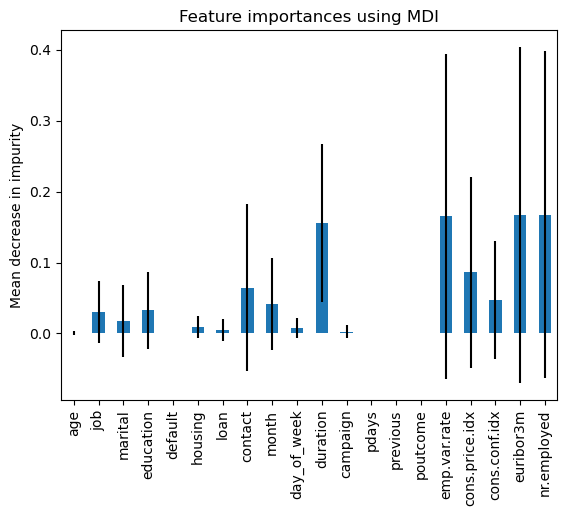

In [52]:
rf_feature_importances.plot.bar(yerr=std)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
# save the figure
plt.savefig('rf_feat_imp.png',bbox_inches='tight', pad_inches=0)
plt.show()

*  'duration' appears to have the highest importance, suggesting that the length of the interaction is a strong predictor of the target variable. Other potentially important features include 'emp.var.rate' (employment variation rate), 'euribor3m' (Euribor 3-month rate), and 'poutcome' (previous outcome of a marketing campaign).
* The error bars (represented by the vertical lines) indicate the uncertainty or variability in the feature importances. It's possible that some features interact with each other, and their combined effect might be more significant than when considered individually.

In [53]:
print("\n Classification Report:")
print(classification_report(y_test,y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      5789
           1       0.25      0.77      0.38       326

    accuracy                           0.86      6115
   macro avg       0.62      0.82      0.65      6115
weighted avg       0.95      0.86      0.89      6115



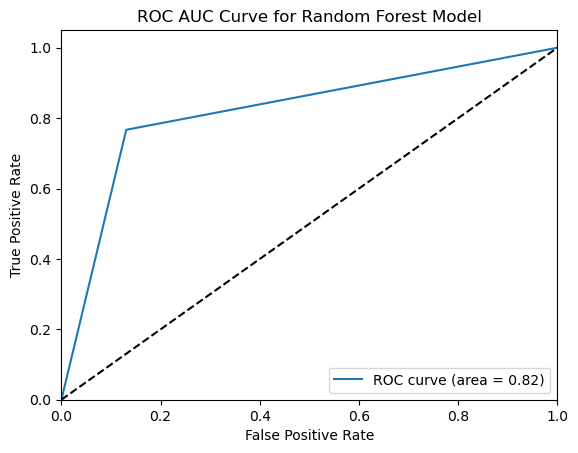

In [54]:
#ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Random Forest Model')
plt.legend(loc="lower right")
# save the figure
plt.savefig('roc_auc_rf.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### Logistic Regression

In [55]:
l = LogisticRegression(class_weight='balanced')
l.fit(X_train_sm,y_res)
y_pred_l = l.predict(X_test)
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      5789
           1       0.25      0.81      0.38       326

    accuracy                           0.86      6115
   macro avg       0.62      0.84      0.65      6115
weighted avg       0.95      0.86      0.89      6115



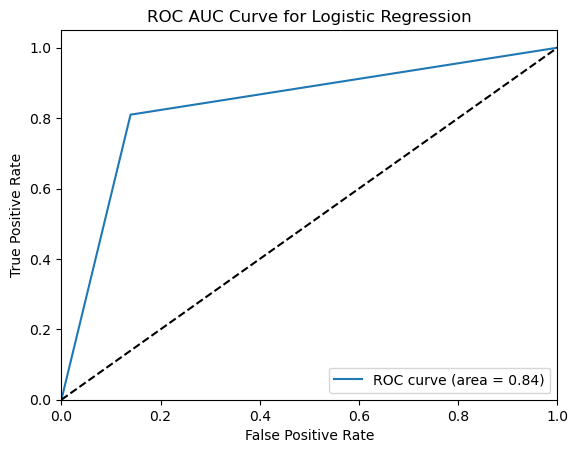

In [56]:
roc_auc = roc_auc_score(y_test, y_pred_l)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_l)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Logistic Regression')
plt.legend(loc="lower right")
# save the figure
plt.savefig('roc_auc_LogReg.png',bbox_inches='tight', pad_inches=0)
plt.show()

In [57]:
rfe = RFE(estimator=l,n_features_to_select=10)
rfe.fit(X_train_sm,y_res)
s = rfe.ranking_
rfe_feature_importances = pd.Series(s, index=X_train.columns)
rfe_feature_importances

age                7
job                1
marital            8
education          3
default            6
housing            1
loan               1
contact            1
month              1
day_of_week        4
duration           1
campaign           2
pdays             10
previous          11
poutcome           9
emp.var.rate       1
cons.price.idx     1
cons.conf.idx      5
euribor3m          1
nr.employed        1
dtype: int64

#### XGB Classifier

In [58]:
import xgboost as xgb

In [59]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define parameter grid to tune
param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:27:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722454208864/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:27:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722454208864/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:27:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722454208864/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/srikanta/anaconda3/envs/TensorFlow/lib/python3.9/site-packages/xgboost/core.

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
Best accuracy:  0.9502414199458247


In [60]:
my_model = xgb.XGBClassifier(learning_rate= 0.1, max_depth = 6, n_estimators = 50)
my_model.fit(X_train_sm, y_res)

# Predicting the Test set results
y_pred_xgb = my_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5789
           1       0.45      0.61      0.52       326

    accuracy                           0.94      6115
   macro avg       0.72      0.78      0.74      6115
weighted avg       0.95      0.94      0.94      6115

[[5550  239]
 [ 127  199]]


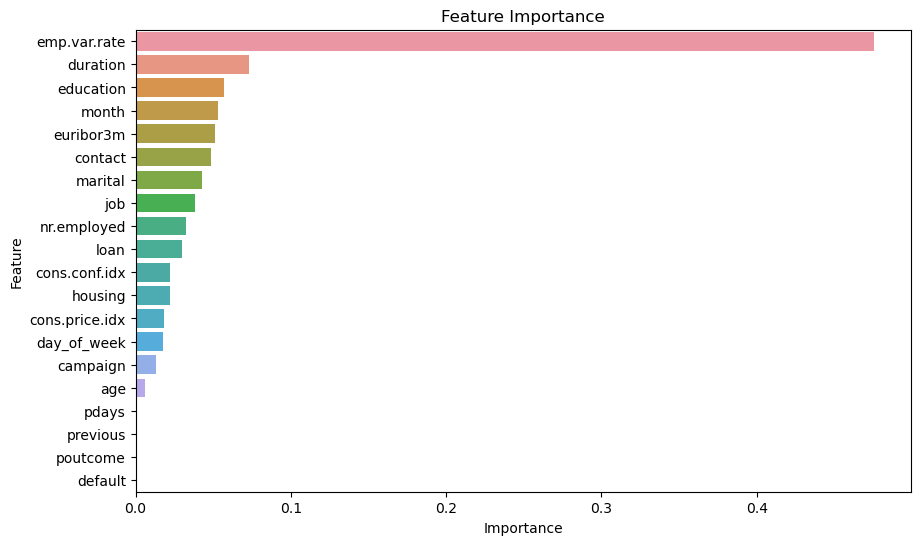

In [61]:
feature_importances = my_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
# save the figure
plt.savefig('xgb_clf.png',bbox_inches='tight', pad_inches=0)
plt.show()

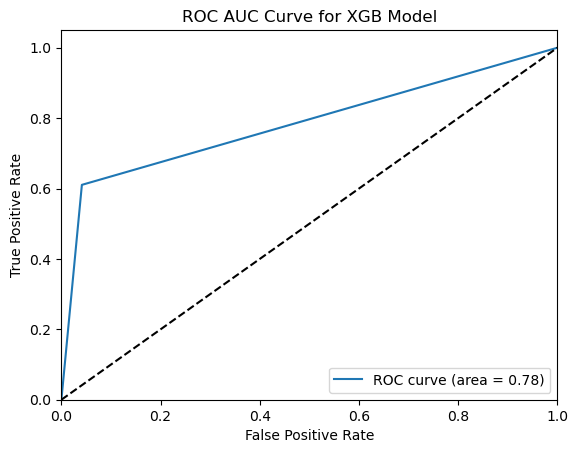

In [62]:
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for XGB Model')
plt.legend(loc="lower right")
# save the figure
plt.savefig('roc_auc_xgb.png',bbox_inches='tight', pad_inches=0)
plt.show()

#### DecisionTree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_sm, y_res)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5789
           1       0.39      0.49      0.44       326

    accuracy                           0.93      6115
   macro avg       0.68      0.73      0.70      6115
weighted avg       0.94      0.93      0.94      6115

[[5542  247]
 [ 165  161]]


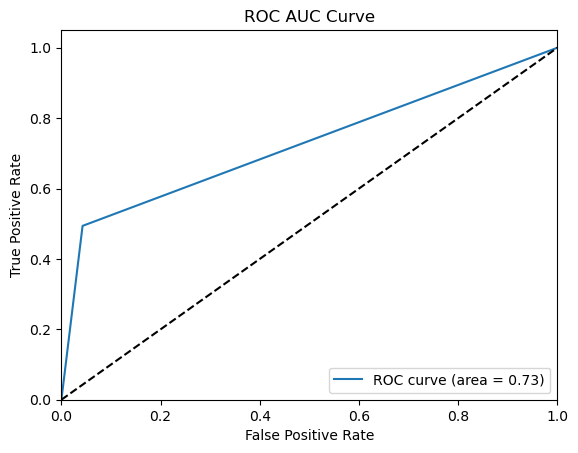

In [64]:
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
# save the figure
plt.savefig('roc_auc_DT.png',bbox_inches='tight', pad_inches=0)
plt.show()

### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gb_clf = GradientBoostingClassifier()

# Define parameter grid to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.7s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_e

In [67]:
gb = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators = 50)
gb.fit(X_train_sm,y_res)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5789
           1       0.34      0.74      0.47       326

    accuracy                           0.91      6115
   macro avg       0.66      0.83      0.71      6115
weighted avg       0.95      0.91      0.92      6115



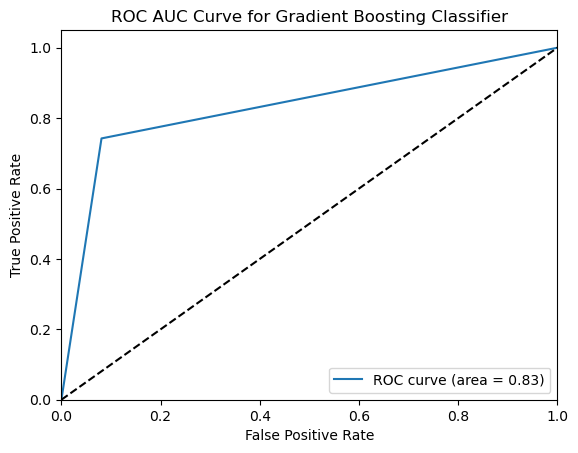

In [68]:
roc_auc = roc_auc_score(y_test, y_pred_gb)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
# save the figure
plt.savefig('roc_auc_GBC.png',bbox_inches='tight', pad_inches=0)
plt.show()

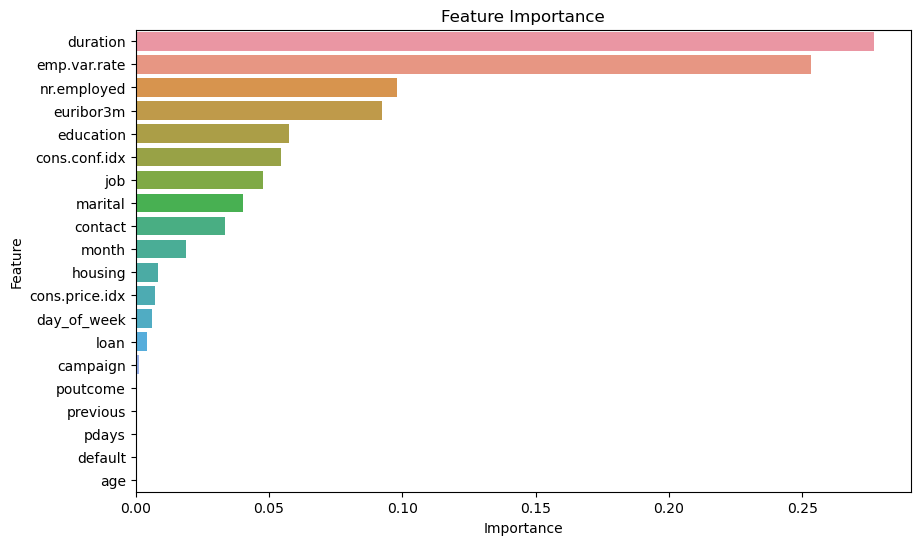

In [69]:
feature_importances = gb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
# save the figure
plt.savefig('roc_auc_GBC_feat_imp.png',bbox_inches='tight', pad_inches=0)
plt.show()

* **Dominant Features**: 'duration' and 'emp.var.rate' are the two most important features, indicating that the length of the interaction and the employment variation rate are strong predictors.
* **Feature Relationships**: The relative positions of the features suggest potential relationships or dependencies. For example, 'nr.employed' and 'emp.var.rate' might be correlated, as they both relate to economic conditions.
* **Feature Groups**: Some features can be grouped together based on their proximity in the ranking. For instance, features related to economic indicators ('emp.var.rate', 'nr.employed', 'euribor3m', 'cons.price.idx', 'cons.conf.idx') are clustered together.

Team D - Workbook Contributers 
* Srikanta Pal(Team Lead)
* Rajath B A
* Sandeep Verma 
* Rashi
* Shalinee Bharat Goyal(Team Co-lead)
* Rushikesh 